In [1]:
import sys
sys.path.append('../src')
from utils import *
import pandas as pd

df = pd.read_csv('../data/Sports_and_Outdoors_5_2016_2018.csv')
df = df[['reviewerID', 'asin']]
df = df.drop_duplicates()
df.head()

,reviewerID,asin
0,ASAE9FBGAJQAH,0899332757
1,A1TAW91SQSU2AH,0899332757
2,A1SVGO4GMEOXQ0,0899332757
3,A36QT6N7N0GF3O,0899332757
4,AJGZDX7KC5TVQ,0899332757


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1315215 entries, 0 to 1366264
Data columns (total 2 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   reviewerID  1315215 non-null  object
 1   asin        1315215 non-null  object
dtypes: object(2)
memory usage: 30.1+ MB


In [3]:
# df = df.head(300000)

In [4]:
# Transform the dataframe to a transactionnal dataframe
df = df.groupby('reviewerID')['asin'].apply(list).reset_index(name='items')
df['items'] = df['items'].apply(lambda x: list(set(x)))
df

,reviewerID,items
0,A0001528BGUBOEVR6T5U,[B012ZIGVXE]
1,A0024836TBQJ1WBE4VDY,"[B00AU67NEA, B00E2217I6, B01AISP1KW, B001CXFHK..."
2,A0029274J35Q1MYNKUWO,"[B0009349R8, B000LC5S18, B000PD6QJ6, B000N8MUR..."
3,A0036244LFNO78OM4135,"[B001N3MKT2, B00R7AGTKG, B003BLP0I2, B01BE07ZK..."
4,A0065811S4ANKB4TYHII,"[B004R5V47C, B0002IMP94, B00OHJDDPY]"
...,...,...
262080,AZZW780H8VJ8N,"[B01E4YVCOA, B001O2PKGM, B01AAGVWJG, B00XJ5IUG..."
262081,AZZYI1EW1WY3M,"[B01GMCSLDC, B00LUMKP34, B00DDZGCOW, B00T2V9ON..."
262082,AZZYVIRS854I7,"[B00318CLTG, B0159JSKYE, B006NZ65L4, B00ZK4ZU1U]"
262083,AZZYW4YOE1B6E,"[B00HN47G1M, B013CVSXF2, B005YPK9SY, B002WN91Q2]"


In [5]:
df.to_csv('../data/transactional.csv', index=False, header=False)

In [6]:
df = df.head(200000)

In [7]:
# Count number of unique reviewers
reviewers = df['reviewerID'].unique()
len(reviewers)

200000

In [8]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd

In [9]:
# Use the transaction encoder to transform the dataframe to a one-hot encoded boolean dataframe
te = TransactionEncoder()
te_ary = te.fit(df['items']).transform(df['items'])
df_transactions = pd.DataFrame(te_ary, columns=te.columns_)
df_transactions

,0000032034,0899332757,0899333257,0971100764,1926644425,3843518912,7245456275,7245456313,9877000490,B000002NUS,...,B01HJ4DN08,B01HJ4EYS8,B01HJ8YC0Y,B01HJA241G,B01HJA7KWE,B01HJDGJ1E,B01HJDHNX2,B01HJDZ34I,B01HJGAJ9O,B01HJHHBHG
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
199996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
199997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
199998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Save df as transactions.csv
df_transactions.to_csv('../data/transactions.csv', index=False)

In [10]:
# Call to the apriori algorithm
frequent_itemsets = apriori(df_transactions, min_support=0.002, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.004250,(B00079ULA8)
1,0.003015,(B000MF63M2)
2,0.002050,(B000OTG7FE)
3,0.004790,(B000VAPCU2)
4,0.002510,(B0012Q2S4W)
...,...,...
147,0.002095,"(B016UQXB26, B016UQXB5I, B00VHX8G5A, B00N3XXXCS)"
148,0.002095,"(B016UQXB5I, B00PD8JOTW, B00VHX8G5A, B016UQXB26)"
149,0.004875,"(B00SI9UB7M, B00TZ900I4, B00SK74C5Y, B00RM8I0LE)"
150,0.004785,"(B00RM8I0LE, B00TZ900I4, B000VAPCU2, B00SK74C5..."


<Axes: xlabel='length'>

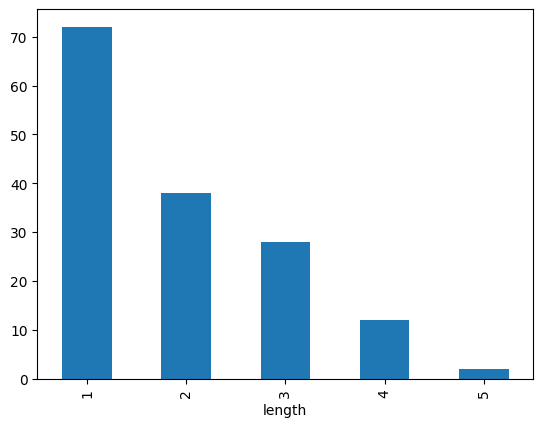

In [11]:
# Plot distrubution of length of frequent itemsets
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets['length'].value_counts().plot.bar()

In [12]:
# Transform df to row series
reviewed_series = df['items'].explode()
reviewed_series = reviewed_series.groupby(reviewed_series.index).apply(list)

In [14]:
from skmine.itemsets import LCM

In [21]:
n = len(reviewed_series)
ratio = 0.002
min_supp = int(n * ratio)

print(f'Minimum support: {min_supp}')
lcm = LCM(min_supp=min_supp)

closed_pattern = lcm.fit_transform(reviewed_series)
closed_pattern

Minimum support: 400


,itemset,support
0,[B001T7QJ9O],989
1,"[B00RM8I0LE, B00SI9UB7M, B00SK74C5Y, B00TZ900I4]",975
2,[B000VAPCU2],958
3,"[B000VAPCU2, B00RM8I0LE, B00SI9UB7M, B00SK74C5...",957
4,[B00136X6VU],861
...,...,...
73,[B00UFOYFR0],407
74,[B00FO9ZRYQ],405
75,"[B00WQCP6GS, B014W9SY4I]",404
76,[B0013R67A6],404


<Axes: xlabel='length'>

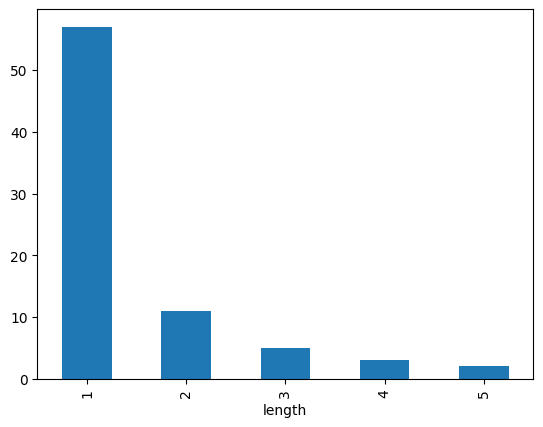

In [23]:
# Plot distrubution of length of frequent itemsets
closed_pattern['length'] = closed_pattern['itemset'].apply(lambda x: len(x))
closed_pattern['length'].value_counts().plot.bar()


In [16]:

from pattern_mining import create_and_fit_lcm

patterns = create_and_fit_lcm(df, supp_ratio=0.002)

In [18]:
# Extract association rules from the dataframe
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

In [19]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(B00079ULA8),(B00136X6VU),0.004250,0.004305,0.004250,1.000000,232.288037,0.004232,inf,0.999945
1,(B00136X6VU),(B00079ULA8),0.004305,0.004250,0.004250,0.987224,232.288037,0.004232,77.940068,1.000000
2,(B00079ULA8),(B0015LT03G),0.004250,0.004290,0.004250,1.000000,233.100233,0.004232,inf,0.999960
3,(B0015LT03G),(B00079ULA8),0.004290,0.004250,0.004250,0.990676,233.100233,0.004232,106.794187,1.000000
4,(B00079ULA8),(B0015LY0DG),0.004250,0.004290,0.004250,1.000000,233.100233,0.004232,inf,0.999960
...,...,...,...,...,...,...,...,...,...,...
467,(B016UQXB26),"(B016UQXB5I, B00PD8JOTW, B00VHX8G5A, B00N3XXXCS)",0.002100,0.002095,0.002095,0.997619,476.190476,0.002091,419.120100,1.000000
468,(B016UQXB5I),"(B00PD8JOTW, B00N3XXXCS, B00VHX8G5A, B016UQXB26)",0.002100,0.002095,0.002095,0.997619,476.190476,0.002091,419.120100,1.000000
469,(B00PD8JOTW),"(B016UQXB5I, B00N3XXXCS, B00VHX8G5A, B016UQXB26)",0.002095,0.002095,0.002095,1.000000,477.326969,0.002091,inf,1.000000
470,(B00VHX8G5A),"(B016UQXB5I, B00PD8JOTW, B00N3XXXCS, B016UQXB26)",0.002100,0.002095,0.002095,0.997619,476.190476,0.002091,419.120100,1.000000
